In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("C:/Users/Wommack/Desktop/ML/survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.isna().mean()

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [6]:
data=data.drop('comments', axis=1)

In [7]:
#data.info()

In [8]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [9]:
data['self_employed'].mode()

0    No
dtype: object

In [10]:
data['self_employed']=data['self_employed'].fillna('No')
#data.info()

In [11]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [12]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [13]:
data['work_interfere']= data['work_interfere'].fillna('Sometimes')
#data.info()

In [14]:
data=data.drop('Timestamp', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [15]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [16]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [17]:
def encode_gender(x):
    if x.lower()[0]== 'f':
        return 0
    elif x.lower()[0]== 'm':
        return 1
    else:
        return 2

In [18]:
data['Gender']= data['Gender'].apply(encode_gender)

In [19]:
target= 'treatment'

binary_features= [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features= [
    'work_interfere',
    'no_employees'
]

nominal_features= [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [20]:
def binary_encode(df, columns, positive_values):
    df=df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column]= df[column].apply(lambda x: 1 if x== positive_value else 0)
    return df
    
def ordinal_encode(df, columns, orderings):
    df= df.copy()
    for column, ordering in zip(columns, orderings):
        df[column]= df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns,prefixes):
    df= df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies= pd.get_dummies(df[column],prefix)
        df= pd.concat([df, dummies], axis=1)
        df= df.drop(column, axis=1)
    return df



In [21]:
data.head(10)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,United States,IL,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,1,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,1,Canada,NaN,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,1,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,1,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,1,United States,TN,No,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,0,United States,MI,No,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,1,Canada,NaN,No,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,0,United States,IL,No,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,1,Canada,NaN,No,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [22]:
binary_positive_values= ['Yes' for feature in binary_features ]

ordinal_orderings= [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]
nominal_prefixes=[
    'co',
    'st',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]


In [23]:


data= binary_encode(
    data,
    columns= binary_features,
    positive_values= binary_positive_values
)

data= ordinal_encode(
    data,
    columns= ordinal_features,
    orderings= ordinal_orderings
)
data= onehot_encode(
    data,
    columns= nominal_features,
    prefixes=nominal_prefixes
)

In [24]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Maybe,pi_No,pi_Yes,mp_Don't know,mp_No,mp_Yes
0,37,0,0,0,Yes,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0


In [25]:
data.select_dtypes('object')

,treatment
0,Yes
1,No
2,No
3,Yes
4,No
...,...
1254,Yes
1255,Yes
1256,Yes
1257,No


In [26]:
data= binary_encode(data, columns=['treatment'], positive_values=['Yes'])
data['treatment'].head()

0    1
1    0
2    0
3    1
4    0
Name: treatment, dtype: int64

In [27]:
data.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Maybe,pi_No,pi_Yes,mp_Don't know,mp_No,mp_Yes
0,37,0,0,0,1,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,0,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,1,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,0,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0
5,33,1,0,1,0,2,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
6,35,0,0,1,1,2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
7,39,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
8,42,0,0,1,1,2,3,0,1,0,...,1,0,1,0,1,0,0,0,1,0
9,23,1,0,0,0,0,2,0,1,0,...,1,1,0,0,1,0,0,0,0,1


SPLITING AND SCALING

In [28]:
y= data['treatment'].copy()
X= data.drop('treatment', axis=1).copy()

In [29]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size= 0.7, random_state= 100)

TRAINING

In [31]:
X.shape

(1259, 143)

In [32]:
print('Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%' .format(y_train.mean()* 100, (1-y_train.mean())*100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [33]:
def MAPE(y_true,y_pred):
    y_true, y_pred= np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [34]:
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor
from sklearn import metrics
import random as rd
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('RFC',RandomForestClassifier())
          #('SVR', SVR()),
          #('GBM', GradientBoostingRegressor()),
          #("XGBoost", XGBRegressor(objective='reg:squarederror'))
         ]

In [35]:
for name, regressor in models:
    modela = regressor
    modela.fit(X_train, y_train)
    y_pred = modela.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    RMSE2=metrics.mean_squared_error(y_test,y_pred, squared=False)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    M_A_P_E = MAPE(y_test,y_pred)
    r2=metrics.r2_score(y_test,y_pred)
    print(f"MSE: {round(MSE, 4)} ({name})")
    print(f"RMSE: {round(RMSE, 4)} ({name})")
    print(f"RMSE2: {round(RMSE2, 4)} ({name})")
    print(f"MAE: {round(MAE, 4)} ({name})")
    print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
    print(f"r2: {round(r2, 4)} ({name})")
    print("==============================================")
    

MSE: 1.4731762734181152e+27 (LR)
RMSE: 38381978497963.27 (LR)
RMSE2: 38381978497963.27 (LR)
MAE: 4414730824628.631 (LR)
MAPE: 441473082462863.06 (LR)
r2: -5.90924787768659e+27 (LR)
MSE: 0.2029 (Ridge)
RMSE: 0.4504 (Ridge)
RMSE2: 0.4504 (Ridge)
MAE: 0.3807 (Ridge)
MAPE: 38.0719 (Ridge)
r2: 0.1863 (Ridge)
MSE: 0.2502 (Lasso)
RMSE: 0.5002 (Lasso)
RMSE2: 0.5002 (Lasso)
MAE: 0.5002 (Lasso)
MAPE: 50.015 (Lasso)
r2: -0.0034 (Lasso)
MSE: 0.2768 (KNN)
RMSE: 0.5261 (KNN)
RMSE2: 0.5261 (KNN)
MAE: 0.4656 (KNN)
MAPE: 46.5608 (KNN)
r2: -0.1104 (KNN)
MSE: 0.2857 (CART)
RMSE: 0.5345 (CART)
RMSE2: 0.5345 (CART)
MAE: 0.2857 (CART)
MAPE: 28.5714 (CART)
r2: -0.1461 (CART)
MSE: 0.1785 (RF)
RMSE: 0.4225 (RF)
RMSE2: 0.4225 (RF)
MAE: 0.3256 (RF)
MAPE: 32.5635 (RF)
r2: 0.284 (RF)
MSE: 0.2804 (RFC)
RMSE: 0.5296 (RFC)
RMSE2: 0.5296 (RFC)
MAE: 0.2804 (RFC)
MAPE: 28.0423 (RFC)
r2: -0.1248 (RFC)


In [36]:
importance= modela.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))
    print("==============================================")

Feature: 0, Score: 0.00035
Feature: 1, Score: 0.02783
Feature: 2, Score: 0.01140
Feature: 3, Score: 0.07305
Feature: 4, Score: 0.07700
Feature: 5, Score: 0.04425
Feature: 6, Score: 0.01835
Feature: 7, Score: 0.01390
Feature: 8, Score: 0.01510
Feature: 9, Score: 0.00227
Feature: 10, Score: 0.00063
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00134
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00081
Feature: 15, Score: 0.00018
Feature: 16, Score: 0.00699
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00042
Feature: 21, Score: 0.00051
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00020
Feature: 24, Score: 0.00187
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00551
Feature: 27, Score: 0.00011
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00223
Feature: 30, Score: 0.00584
Feature: 31, Score: 0.00077
Feature: 32, Score: 0.00072
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00018
Feature: 35, Score: 0.00068
Fe

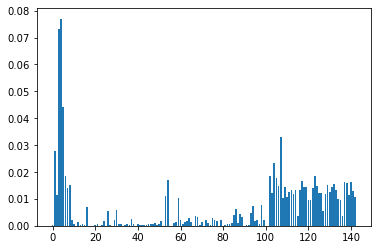

In [37]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
data.shape

(1259, 144)

In [39]:
model= RandomForestClassifier()
model.fit(X_train, y_train)


dt= data.drop('treatment', axis=1).copy()


y_pred = model.predict(X_test)
feature_imp= pd.Series(model.feature_importances_, index= dt.columns).sort_values(ascending=False)
feature_imp*100


work_interfere    8.375262
family_history    7.650591
no_employees      4.318366
ca_Yes            3.663828
be_Yes            2.519079
                    ...   
co_Zimbabwe       0.000000
co_Hungary        0.000000
co_China          0.000000
co_Colombia       0.000000
co_Costa Rica     0.000000
Length: 143, dtype: float64

In [40]:
model= RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
feature_imp= pd.Series(model.feature_importances_, index= dt.columns).sort_values(ascending=False)
feature_imp=feature_imp*100
feature_imp

family_history    13.751065
work_interfere    13.322578
ca_Yes             5.314206
no_employees       4.280105
Gender             2.775453
                    ...    
co_Hungary         0.000000
co_Thailand        0.000000
co_Philippines     0.000000
co_Mexico          0.000000
co_Denmark         0.000000
Length: 143, dtype: float64

In [41]:
feature_imp.mean()

0.699300699300699

In [42]:
data.shape

(1259, 144)

In [43]:
#split the dataset into features and labels
X1=data[['Age','tech_company','family_history','work_interfere','ca_Yes','no_employees','Gender','be_Yes',
         'ca_No','co_United States','mc_No','pi_Maybe','remote_work','ca_Not sure','obs_consequence',
          'pi_No','cw_Some of them','mc_Maybe','le_Somewhat easy','mc_Yes','mp_No','we_No',
         'su_Yes','le_Somewhat difficult', 'self_employed', 'cw_No', 'su_No', 'tech_company', 'se_No', 'ph_No',
         'an_Yes', 'mp_Yes', 'st_CA', 'ph_Maybe', 'su_Some of them','be_No','se_Yes','pi_Yes','cw_Yes',
        'co_United Kingdom','we_Yes','mi_No','le_Very difficult','mi_Maybe','le_Very easy','st_TX']]

y1=data['treatment']
         
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.70, random_state=45)
 


In [44]:
#def MAPE(y_true1,y_pred1):
#    y_true1, y_pred1= np.array(y_true1),np.array(y_pred1)
#    return np.mean(np.abs((y_true1 - y_pred1)/ np.maximum(np.ones(len(y_true1)), np.abs(y_true1))))*100

In [45]:
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor
from sklearn import metrics
import random as rd
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('RFC',RandomForestClassifier())
          #('SVR', SVR()),
          #('GBM', GradientBoostingRegressor()),
          #("XGBoost", XGBRegressor(objective='reg:squarederror'))
         ]

In [46]:
for name, regressor in models:
    modela = regressor
    modela.fit(X_train1, y_train1)
    y_pred1 = modela.predict(X_test1)
    MSE = metrics.mean_squared_error(y_test1,y_pred1)
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_test1,y_pred1)
    #M_A_P_E = MAPE(y_test1,y_pred1)
    r2=metrics.r2_score(y_test1,y_pred1)
    print(f"RMSE: {round(RMSE, 4)} ({name})")
    print(f"MAE: {round(MAE, 4)} ({name})")
    #print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
    print(f"r2: {round(r2, 4)} ({name})")

RMSE: 915730.0742 (LR)
MAE: 30834.6129 (LR)
r2: -3354263522673.051 (LR)
RMSE: 928178.5692 (Ridge)
MAE: 31253.7745 (Ridge)
r2: -3446079544374.686 (Ridge)
RMSE: 297974.6342 (Lasso)
MAE: 10033.8274 (Lasso)
r2: -355157356574.2284 (Lasso)
RMSE: 0.5034 (KNN)
MAE: 0.4458 (KNN)
r2: -0.0137 (KNN)
RMSE: 0.6126 (CART)
MAE: 0.3753 (CART)
r2: -0.5011 (CART)
RMSE: 0.4369 (RF)
MAE: 0.3669 (RF)
r2: 0.2363 (RF)
RMSE: 0.5281 (RFC)
MAE: 0.2789 (RFC)
r2: -0.1157 (RFC)


In [47]:
"""A correlation coefficient of .10(R*2= 0.01) is generally considered to be a weak or small association.
.30(R*2=0.09) is considered a moderate association
.50(R*2=0.25) or larger is thought to present a strong or large association
The value of the R-squared means the percentage of the data the model explains. Thus, the higher the R-sqaured value the better the model is fitted.
Unfortunately, R-squared does not inform if the regression model has an adequate fit or not.
Also, R-squared cannot be used to check if the coefficient estimates and predictions are biased or not.

Low R-SQUARED vs HIGH R-SQUARED
Regression models with low R_squared do not always pose a problem. There are some areas where you are bound to have low R-squared
    values. One of such is when you study human behaviour. They tend to have R-squared values less than 50%. The reason is that predicting 
    people is a more difficult task than predicting a physical process.

goodness of fit is a mathematical model that describes the differences between the observed values and the expected values or how well a model fits a set of observations.


knowledgehut.com



R2 is negative only when the chosen model does not follow the trend of the data. It seems that your model may be giving better performance because of overfitting.
"""

'A correlation coefficient of .10(R*2= 0.01) is generally considered to be a weak or small association.\n.30(R*2=0.09) is considered a moderate association\n.50(R*2=0.25) or larger is thought to present a strong or large association\nThe value of the R-squared means the percentage of the data the model explains. Thus, the higher the R-sqaured value the better the model is fitted.\nUnfortunately, R-squared does not inform if the regression model has an adequate fit or not.\nAlso, R-squared cannot be used to check if the coefficient estimates and predictions are biased or not.\n\nLow R-SQUARED vs HIGH R-SQUARED\nRegression models with low R_squared do not always pose a problem. There are some areas where you are bound to have low R-squared\n    values. One of such is when you study human behaviour. They tend to have R-squared values less than 50%. The reason is that predicting \n    people is a more difficult task than predicting a physical process.\n\ngoodness of fit is a mathematical m

In [48]:
#split the dataset into features and labels
X2= data[['work_interfere','family_history','no_employees', 'ca_Yes', 'Gender', 'be_Yes']]
y2=data['treatment']
         
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.70, random_state=45)
 


In [49]:

for name, regressor in models:
    modela = regressor
    modela.fit(X_train2, y_train2)
    y_pred2 = modela.predict(X_test2)
    MSE = metrics.mean_squared_error(y_test2,y_pred2)
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_test2,y_pred2)
    #M_A_P_E = MAPE(y_test1,y_pred1)
    r2=metrics.r2_score(y_test2,y_pred2)
    print(f"RMSE: {round(RMSE, 4)} ({name})")
    print(f"MAE: {round(MAE, 4)} ({name})")
    #print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
    print(f"r2: {round(r2, 4)} ({name})")
    print("===============================================")

RMSE: 0.4418 (LR)
MAE: 0.369 (LR)
r2: 0.2193 (LR)
RMSE: 0.4415 (Ridge)
MAE: 0.3694 (Ridge)
r2: 0.2203 (Ridge)
RMSE: 0.5006 (Lasso)
MAE: 0.5001 (Lasso)
r2: -0.0022 (Lasso)
RMSE: 0.4537 (KNN)
MAE: 0.3444 (KNN)
r2: 0.1766 (KNN)
RMSE: 0.4872 (CART)
MAE: 0.3303 (CART)
r2: 0.0506 (CART)
RMSE: 0.4509 (RF)
MAE: 0.3378 (RF)
r2: 0.1869 (RF)
RMSE: 0.5324 (RFC)
MAE: 0.2834 (RFC)
r2: -0.1338 (RFC)


In [50]:
-0.1429>-0.0022

False

>1, train: 0.486, test: 0.521
>1, train: 0.491, test: 0.513
>1, train: 0.483, test: 0.521
>1, train: 0.507, test: 0.544
>1, train: 0.480, test: 0.518
>1, train: 0.478, test: 0.510
>1, train: 0.507, test: 0.544
>1, train: 0.499, test: 0.526
>1, train: 0.489, test: 0.522
>1, train: 0.483, test: 0.514
>1, train: 0.497, test: 0.542
>1, train: 0.494, test: 0.521
>1, train: 0.491, test: 0.524
>1, train: 0.497, test: 0.526
>1, train: 0.486, test: 0.519
>1, train: 0.507, test: 0.545
>1, train: 0.491, test: 0.524
>1, train: 0.486, test: 0.521
>1, train: 0.507, test: 0.547
>1, train: 0.491, test: 0.519
>1, train: 0.491, test: 0.524
>1, train: 0.497, test: 0.527
>1, train: 0.486, test: 0.522
>1, train: 0.494, test: 0.528
>1, train: 0.497, test: 0.542
>1, train: 0.491, test: 0.524
>1, train: 0.478, test: 0.508
>1, train: 0.491, test: 0.524
>1, train: 0.491, test: 0.523


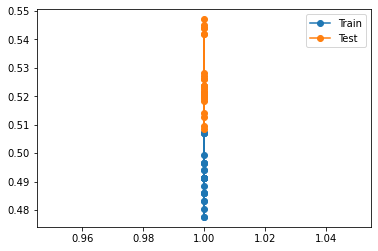

In [51]:
from sklearn.ensemble import RandomForestClassifier
#define the tree depths to evaluate
values= [1 for i in range(1,30)]
#evaluate a model(e.g decision tree for each depth)
train_scores2, test_scores2= list(), list()
for i in values:
    model=RandomForestClassifier(max_depth=i)
    #fit model on the training dataset
    model.fit(X_train2,y_train2)
    #evaluate on the train dataset
    train_yhat2=model.predict(X_train2)
    train_acc2= metrics.mean_squared_error(y_train2, train_yhat2, squared= False)
    train_scores2.append(train_acc2)
    #evaluate on the test dataset
    test_yhat2=model.predict(X_test2)
    test_acc2= metrics.mean_squared_error(y_test2, test_yhat2,squared= False)
    test_scores2.append(test_acc2)
    #summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc2, test_acc2))

#plot of train and test scores vs tree depth
pyplot.plot(values, train_scores2, '-o', label='Train')
pyplot.plot(values, test_scores2, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [52]:
#split the dataset into features and labels
X3= data[['work_interfere','family_history','no_employees', 'ca_Yes', 'Gender', 'be_Yes']]
y3=data['treatment']
         
X_train3, X_test3, y_train3, y_test3= train_test_split(X3, y3, test_size=0.70, random_state=45)
 

>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600


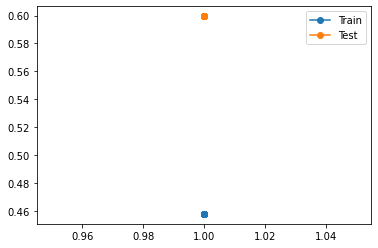

In [53]:
from sklearn.neighbors import KNeighborsClassifier
#define the tree depths to evaluate
values= [1 for i in range(1,30)]
#evaluate a model(e.g decision tree for each depth)
train_scores3, test_scores3= list(), list()
for i in values:
    model= KNeighborsClassifier(n_neighbors=i)
    #fit model on the training dataset
    model.fit(X_train3,y_train3)
    #evaluate on the train dataset
    train_yhat3=model.predict(X_train3)
    train_acc3= metrics.mean_squared_error(y_train3, train_yhat3, squared= False)
    train_scores3.append(train_acc3)
    #evaluate on the test dataset
    test_yhat3=model.predict(X_test3)
    test_acc3=  metrics.mean_squared_error(y_test3, test_yhat3,squared= False)
    test_scores3.append(test_acc3)
    #summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc3, test_acc3))

#plot of train and test scores vs tree depth
pyplot.plot(values, train_scores3, '-o', label='Train')
pyplot.plot(values, test_scores3, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [54]:
#split the dataset into features and labels
X4= data[['work_interfere','family_history','no_employees', 'ca_Yes', 'Gender', 'be_Yes']]
y4=data['treatment']
         
X_train4, X_test4, y_train4, y_test4= train_test_split(X4, y4, test_size=0.70, random_state=45)
 

>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600
>1, train: 0.458, test: 0.600


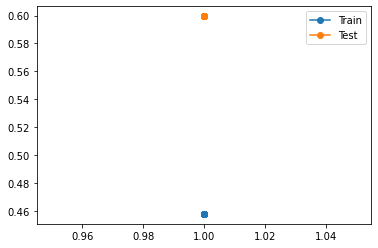

In [55]:
from sklearn.neighbors import KNeighborsRegressor
#define the tree depths to evaluate
values= [1 for i in range(1,30)]
#evaluate a model(e.g decision tree for each depth)
train_scores4, test_scores4= list(), list()
for i in values:
    model= KNeighborsRegressor(n_neighbors=i)
    #fit model on the training dataset
    model.fit(X_train4,y_train4)
    #evaluate on the train dataset
    train_yhat4=model.predict(X_train4)
    train_acc4= metrics.mean_squared_error(y_train4, train_yhat4, squared= False)
    train_scores4.append(train_acc4)
    #evaluate on the test dataset
    test_yhat4=model.predict(X_test4)
    test_acc4=  metrics.mean_squared_error(y_test4, test_yhat4,squared= False)
    test_scores4.append(test_acc4)
    #summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc4, test_acc4))

#plot of train and test scores vs tree depth
pyplot.plot(values, train_scores4, '-o', label='Train')
pyplot.plot(values, test_scores4, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [56]:
#split the dataset into features and labels
X5= data[['work_interfere','family_history','no_employees', 'ca_Yes', 'Gender', 'be_Yes']]
y5=data['treatment']
         
X_train5, X_test5, y_train5, y_test5= train_test_split(X5, y5, test_size=0.70, random_state=45)

In [57]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#define the moldel evaluation method
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#define model
model= LassoCV(alphas= arange(0,1,0.01), cv=cv, n_jobs=-1)
#fit model
model.fit(X_train5,y_train5)
#summarize chosen configuration
print('alpha: %f' %model.alpha_)

C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.810248323753157, tolerance: 0.00847138643067846
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.443051685598405, tolerance: 0.00845840707964602
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is 

alpha: 0.000000


In [58]:
model= Lasso(alpha=0.0)

#fit model
model.fit(X_train5, y_train5)
y_pred5 = model.predict(X_test5)
MSE = metrics.mean_squared_error(y_test5,y_pred5)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test5,y_pred5)
    
r2=metrics.r2_score(y_test5,y_pred5)
print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

RMSE: 0.4418
MAE: 0.369
r2: 0.2193 


<ipython-input-58-d0e951746b3b>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train5, y_train5)
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.31389995791451, tolerance: 0.009405835543766575
  model = cd_fast.enet_coordinate_descent(


In [59]:
#from sklearn.feature_selection import chi2
#from sklearn.preprocessing import LabelEncoder


#X= data.drop('treatment', axis=1).copy()
#y= data['treatment']

#y.shape
#label_encoder= LabelEncoder()
#a=label_encoder.fit_transform(X)
#b=label_encoder.fit_transform(y)
#chi_scores= chi2(a,b)
#chi_scores

FEATURE SELECTION WITH LASSO REGRESSOR

In [60]:
X7=data.drop('treatment', axis=1).values.copy()
y7= data['treatment'].values

In [61]:
#scale X7
X7= scaler.fit_transform(X7)

In [62]:
df= data.drop('treatment', axis=1).columns.copy()
#df

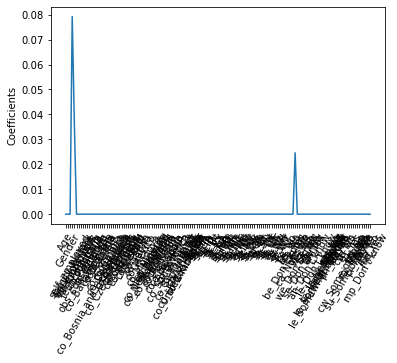

In [63]:
#define model
model= Lasso(alpha=0.1)

#fit model
lasso_coef= model.fit(X7, y7).coef_


#pyplot.bar([x for x in range(len(df))], lasso_coef)
#pyplot.show()

plt.plot(range(len(df)), lasso_coef)
plt.xticks(range(len(df)), df, rotation=60)
plt.ylabel("Coefficients")
plt.show()

In [64]:
print(lasso_coef)

[ 0.         -0.          0.          0.07927067  0.03600728  0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.          0.         -0.
 -0.         -0.         

In [65]:
Lasso_feature_imp= pd.Series(model.coef_, index= dt.columns).sort_values(ascending=False)
Lasso_feature_imp*100

family_history    7.927067
work_interfere    3.600728
ca_Yes            2.460659
mp_Yes            0.000000
co_Romania       -0.000000
                    ...   
st_WV            -0.000000
st_WY            -0.000000
be_Don't know    -0.000000
be_No            -0.000000
Age               0.000000
Length: 143, dtype: float64

In [66]:
Lasso_feature_imp.mean()*100

0.09782135839294008

In [67]:

X_train7, X_test7, y_train7, y_test7= train_test_split(X7, y7, test_size=0.70, random_state=45)

In [68]:
#When lasso is without a parameter
model= Lasso()

#fit model
model.fit(X_train7, y_train7)
y_pred7= model.predict(X_test7)
MSE = metrics.mean_squared_error(y_test7,y_pred7)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test7,y_pred7)    
r2=metrics.r2_score(y_test7,y_pred7)

print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

RMSE: 0.5006
MAE: 0.5001
r2: -0.0022 


In [69]:
#When alpha= 0.0
model= Lasso(alpha=0.0)

#fit model
model.fit(X_train7, y_train7)
y_pred7= model.predict(X_test7)
MSE = metrics.mean_squared_error(y_test7,y_pred7)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test7,y_pred7)    
r2=metrics.r2_score(y_test7,y_pred7)

print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

<ipython-input-69-74b994f17295>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train7, y_train7)
C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


RMSE: 952716.9658
MAE: 33237.6959
r2: -3630697136098.835 


C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.407527539210385, tolerance: 0.009405835543766575
  model = cd_fast.enet_coordinate_descent(


In [70]:
#When lasso is without a parameter
model= Lasso(alpha=0.1)

#fit model
model.fit(X_train7, y_train7)
y_pred7= model.predict(X_test7)
MSE = metrics.mean_squared_error(y_test7,y_pred7)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test7,y_pred7)    
r2=metrics.r2_score(y_test7,y_pred7)

print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

RMSE: 0.4624
MAE: 0.4515
r2: 0.1448 


In [71]:
#split the dataset into features and labels
X6= data[['work_interfere','family_history', 'ca_Yes']]
y6=data['treatment']
X_train6, X_test6, y_train6, y_test6= train_test_split(X6, y6, test_size=0.70, random_state=45)

In [72]:
model= RandomForestRegressor()

#fit model
model.fit(X_train6, y_train6)
y_pred6 = model.predict(X_test6)
MSE = metrics.mean_squared_error(y_test6,y_pred6)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test6,y_pred6)    
r2=metrics.r2_score(y_test6,y_pred6)

print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

RMSE: 0.4236
MAE: 0.3384
r2: 0.2822 


In [73]:
for name, regressor in models:
    modela = regressor
    modela.fit(X_train6, y_train6)
    y_pred6 = modela.predict(X_test6)
    MSE = metrics.mean_squared_error(y_test6,y_pred6)
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_test6,y_pred6)
    #M_A_P_E = MAPE(y_test1,y_pred1)
    r2=metrics.r2_score(y_test6,y_pred6)
    print(f"RMSE: {round(RMSE, 4)} ({name})")
    print(f"MAE: {round(MAE, 4)} ({name})")
    #print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
    print(f"r2: {round(r2, 4)} ({name})")
    print("==============================================")

RMSE: 0.4366 (LR)
MAE: 0.3714 (LR)
r2: 0.2374 (LR)
RMSE: 0.4365 (Ridge)
MAE: 0.3721 (Ridge)
r2: 0.2378 (Ridge)
RMSE: 0.5006 (Lasso)
MAE: 0.5001 (Lasso)
r2: -0.0022 (Lasso)
RMSE: 0.4505 (KNN)
MAE: 0.3574 (KNN)
r2: 0.188 (KNN)
RMSE: 0.4234 (CART)
MAE: 0.3403 (CART)
r2: 0.2829 (CART)
RMSE: 0.4243 (RF)
MAE: 0.3414 (RF)
r2: 0.28 (RF)
RMSE: 0.5006 (RFC)
MAE: 0.2506 (RFC)
r2: -0.0023 (RFC)


In [74]:
reg= RandomForestRegressor()

In [75]:
n_estimators= [int(x) for x in np.linspace(start= 100, stop= 1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
#Randomized Search CV

#Number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start= 100, stop= 1200, num=12)]
max_features=['auto', 'sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [78]:
#Create the random grid
random_grid= {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
#Use the random grid search to search for best hyperparameters
#first create the base model to tune

rf= RandomForestRegressor()

In [80]:
#Random search of parameters, using 3 fold cross validation
#search across 100 different combinations
rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter=10, cv=5, verbose= 2, random_state=2, n_jobs=1)

In [81]:
#split the dataset into features and labels
X8= data[['work_interfere','family_history', 'ca_Yes']]
y8=data['treatment']
X_train8, X_test8, y_train8, y_test8= train_test_split(X8, y8, test_size=0.70, random_state=45)

In [82]:
rf_random.fit(X_train8, y_train8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.3s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.3s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   4.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=   5.6s
[CV] n_estimators=1000, min_samples_

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [83]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [84]:
rf_random.best_score_

-0.17999412967028852

In [85]:
predictions=rf_random.predict(X_test8)

C:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='treatment', ylabel='Density'>

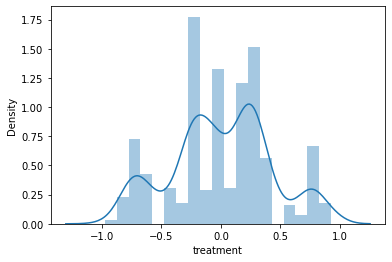

In [86]:
import seaborn as sns
sns.distplot(y_test8-predictions)

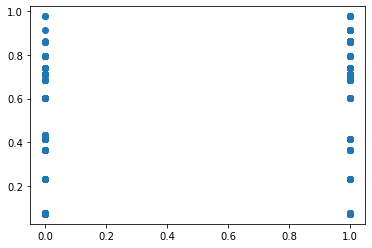

In [87]:
plt.scatter(y_test8, predictions)

In [88]:
MSE = metrics.mean_squared_error(y_test8,predictions)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test8,predictions)    
r2=metrics.r2_score(y_test8,predictions)

print(f"RMSE: {round(RMSE, 4)}")
print(f"MAE: {round(MAE, 4)}")
#print(f"MAPE: {round(M_A_P_E, 4)} ({name})")
print(f"r2: {round(r2, 4)} ")
print("====================================")

RMSE: 0.4232
MAE: 0.3435
r2: 0.2838 


In [89]:
import pickle
#open a file to store the data
file=open('random_forest_regression_model.pkl', 'wb')

#save the information in the file this way
pickle.dump(rf_random, file)